## Introduction
Erste Schritte zum Einfinden in die Datenanalyse. Innerhalb dieses Pakets werden verschiedene Scatter sowie Boxplots visualisiert.

### Laden der Daten 
Zuerst wurden die Daten aus den CSV Dateien geladen. Die Daten wurden in einem DataFrame gespeichert.
Auch mussten die verwendeten DataFrames zusammengefügt werden.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/yellow_tripdata_2020-04.csv")
#df = pd.read_csv("../data/yellow_tripdata_2020-04.csv", nrows=100)

ModuleNotFoundError: No module named 'pandas'

### Zusammenfassen von Zeitintervallen
Entsprechende zusätzliche Informationen wurden aus den bestehenden Daten entnommen und zusätzliche Spalten gefüllt.

In [ ]:
# summarize time data (month/day/weekday/duration/hour)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')

df['tpep_pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
df['tpep_pickup_day_numeric'] = df['tpep_pickup_datetime'].dt.day
df['tpep_dropoff_day_numeric'] = df['tpep_dropoff_datetime'].dt.day
df['tpep_pickup_day_name'] = df['tpep_pickup_datetime'].dt.day_name()
df['tpep_dropoff_day_name'] = df['tpep_dropoff_datetime'].dt.day_name()
df['tpep_pickup_day'] = df['tpep_pickup_datetime'].dt.strftime("%w").astype(int)
df['tpep_dropoff_day'] = df['tpep_dropoff_datetime'].dt.strftime("%w").astype(int)
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['tpep_dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['duration_hours'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'h')
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.seconds

df['PULocationID'].fillna(-1, inplace=True)
df['DOLocationID'].fillna(-1, inplace=True)

### 2. Bereinigen von fehlerhaften Daten (nur für Testdaten)

In [ ]:
# clean data: allow only april data + positiv entries
df = df[ df.tpep_pickup_month == "April" ]
df = df[ df.trip_distance < 1000]
df = df[ df.fare_amount > 0]
df = df[ df.tip_amount > 0]
df = df[ df.total_amount > 0]
df

### Binninig: Zusammenfassung von Wertebereichen
Wichtig für spätere Auswertungen, da diese besser in Visualisierung dargestellt werden können.

In [ ]:
# binning
# Create the labels for the bin
bin_labels_total = [ 10, 20, 30, 50, 100, 500]
bin_labels_duration_hours = [0.05, 0.1, 0.5, 1, 5, 10]
bin_labels_tip = [ 1,2,5, 8,10]

# Define the scope of the bins
bins_total = [0, 10, 20, 30, 50, 100, 500]
bins_duration_hours = [0, 0.05, 0.1, 0.5, 1, 5, 10]
bins_tip = [0, 1, 2, 5,8 ,10]

# Create the "bins" column using the cut function using the bins and labels
df['bins_total'] = pd.cut(df['total_amount'], bins=bins_total, labels=bin_labels_total)
df['bins_duration_hours'] = pd.cut(df['duration_hours'], bins=bins_duration_hours, labels=bin_labels_duration_hours)
df['bins_tip'] = pd.cut(df['tip_amount'], bins=bins_tip, labels=bin_labels_tip)

### Initialer Boxplot
Darstellung eines Boxplots sowie Ausgabe von statistischen Zahlen für die Einschätzung der Daten. 

**Ergebnis:**
 Zonen von 1 bis 265 vorhanden. Vor allem viele Fahrten im Hohen Zonen Bereich vorhanden.

In [ ]:
# boxplot
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
fig = plt.figure(figsize =(10, 7))

# Creating plot

plt.boxplot(df['PULocationID'])
#plt.boxplot(df['tpep_pickup_day_numeric'])
#plt.boxplot(df['fare_amount'])

# describe PUL
print(df['PULocationID'].describe())

# show plot
plt.show()

### Abhängigkeit von Fahrtantritten je Wochentag
Dimension der Wochentage genutzt

**Ergebnis** Viele Fahrten am Donnerstag, wenige am Sonntag. --> Bewohner nutzen Taxis mehr als Touristen

In [ ]:
# trips per weekday
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_day_name",data=df,ax=ax1)

ax2.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_day_name",data=df,ax=ax2)

### Abhängigkeit von Fahrtantritten je Tag im Monat


In [ ]:
#trips per day
df_days = df.groupby(["tpep_pickup_day_numeric"]).mean()

figure, (ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_day_numeric",data=df,ax=ax3)
ax4.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_day_numeric",data=df,ax=ax4)

### Abhängigkeit von Fahrtantritten je Tageszeit im Stundenintervall


In [ ]:
#trips per hour
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,5))
ax5.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_hour",data=df,ax=ax5)
ax6.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_hour",data=df,ax=ax6)

### Abhängigkeit von Fahrzeit und Anzahl der Passagiere

**Ergebnis** Viele Kurzstrecken wurden durchgeführt. Darunter auch viele Fahrten mit nur einer Person. Einbruch bei 4 Passagieren durch den Einsatz ab dieser Personenanzahl eines Großraumtaxis zu erklären. Im Wertebereich von 5 bis 20 Stunden fast keine Fahrten durchgeführt.


In [ ]:
#duration/passenger_count
sns.catplot(y="duration_hours",x="passenger_count",data=df,kind="strip")

In [ ]:
# days/total
sns.lmplot(data=df, x="tpep_pickup_day_numeric", y="total_amount")

In [ ]:
# total/tip/duration
sns.relplot(x="total_amount", y="tip_amount", size="duration_hours", hue="tpep_pickup_day_name",
            alpha=0.99,
            palette="muted",
            height=8,
            data=df)

### Abhängigkeit von Fahrtantritten je Tag im Monat


<AxesSubplot:title={'center':'Dropoff Days'}, xlabel='tpep_dropoff_day_numeric', ylabel='count'>

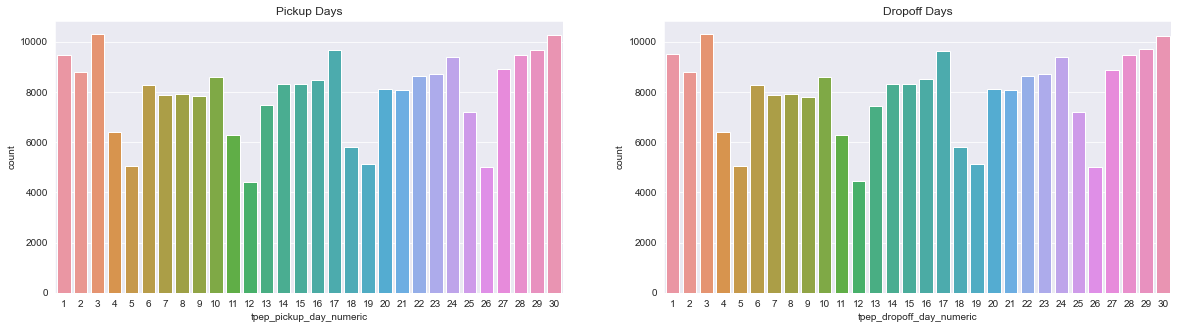

In [ ]:
#trips per day
df_days = df.groupby(["tpep_pickup_day_numeric"]).mean()

figure, (ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_day_numeric",data=df,ax=ax3)
ax4.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_day_numeric",data=df,ax=ax4)

### Abhängigkeit von Fahrtantritten je Tageszeit im Stundenintervall


<AxesSubplot:title={'center':'Dropoff Days'}, xlabel='tpep_dropoff_hour', ylabel='count'>

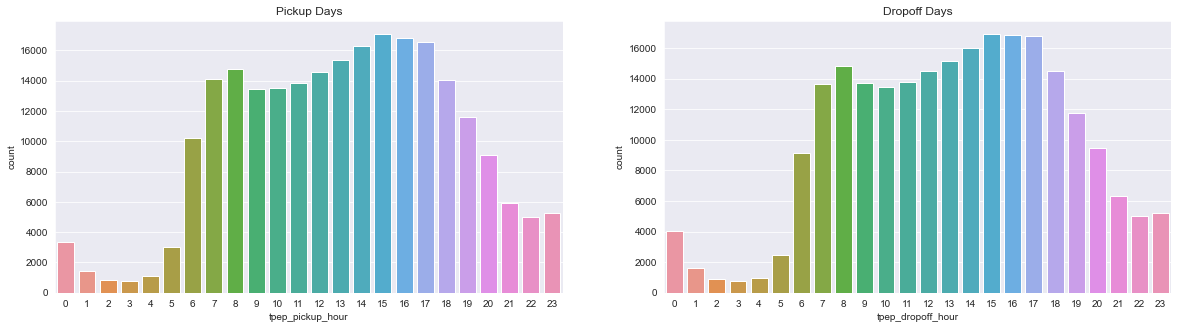

In [ ]:
#trips per hour
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,5))
ax5.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_hour",data=df,ax=ax5)
ax6.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_hour",data=df,ax=ax6)

### Abhängigkeit von Fahrzeit und Anzahl der Passagiere

**Ergebnis** Viele Kurzstrecken wurden durchgeführt. Darunter auch viele Fahrten mit nur einer Person. Einbruch bei 4 Passagieren durch den Einsatz ab dieser Personenanzahl eines Großraumtaxis zu erklären. Im Wertebereich von 5 bis 20 Stunden fast keine Fahrten durchgeführt.


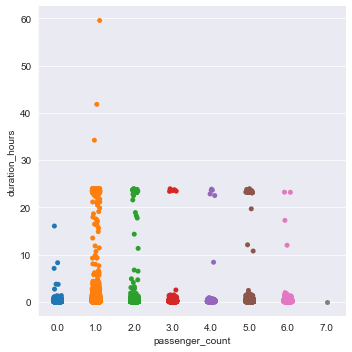

In [ ]:
#duration/passenger_count
sns.catplot(y="duration_hours",x="passenger_count",data=df,kind="strip")

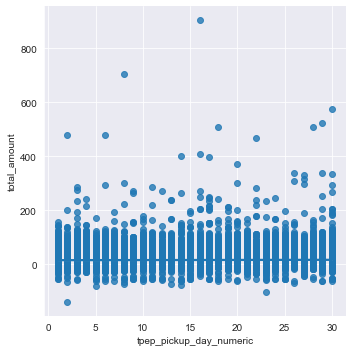

In [ ]:
# days/total
sns.lmplot(data=df, x="tpep_pickup_day_numeric", y="total_amount")

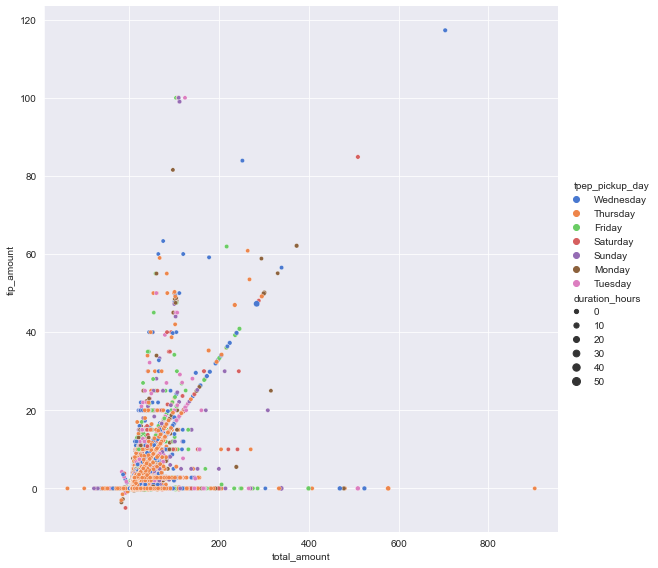

In [ ]:
# total/tip/duration
sns.relplot(x="total_amount", y="tip_amount", size="duration_hours", hue="tpep_pickup_day_name",
            alpha=0.99,
            palette="muted",
            height=8,
            data=df)

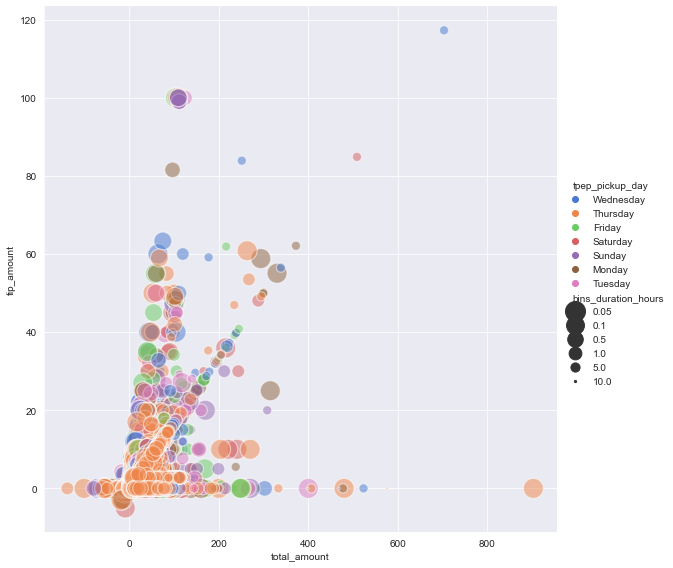

In [ ]:
# total/tip/bin_duration
sns.relplot(x="total_amount", y="tip_amount", size="bins_duration_hours", hue="tpep_pickup_day",  sizes=(5,400),          alpha=0.5,  palette="muted",height=8,data=df)

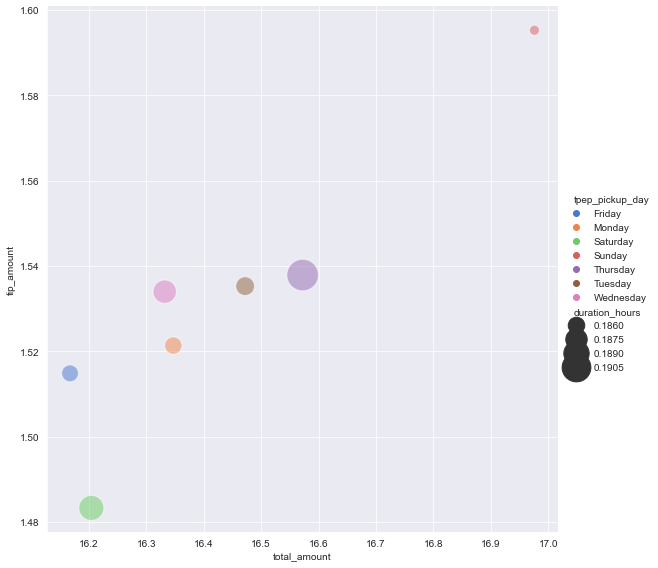

In [ ]:
# total/tip/bin_duration (mean)
df_week_days = df.groupby(["tpep_pickup_day"]).mean()

sns.relplot(x="total_amount", y="tip_amount", size="duration_hours", hue="tpep_pickup_day",  sizes=(100,1000),          alpha=0.5,  palette="muted",height=8,data=df_week_days)

In [ ]:
# DOLocationID/PULocationID + duration or time

In [ ]:
# tip/Location
#sns.scatterplot(data=df, x="PULocationID", y="tip_amount")

In [ ]:
# tip/fare_amount
#sns.scatterplot(data=df, x="fare_amount", y="tip_amount")